In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('PycharmProjects/IncomePrediction/adult.csv')


df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [2]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [4]:
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [5]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [6]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [8]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

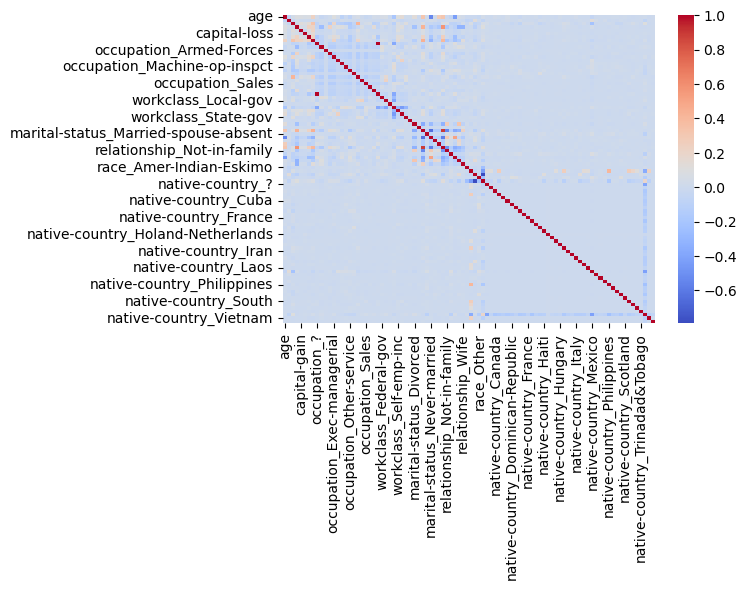

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [10]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [11]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

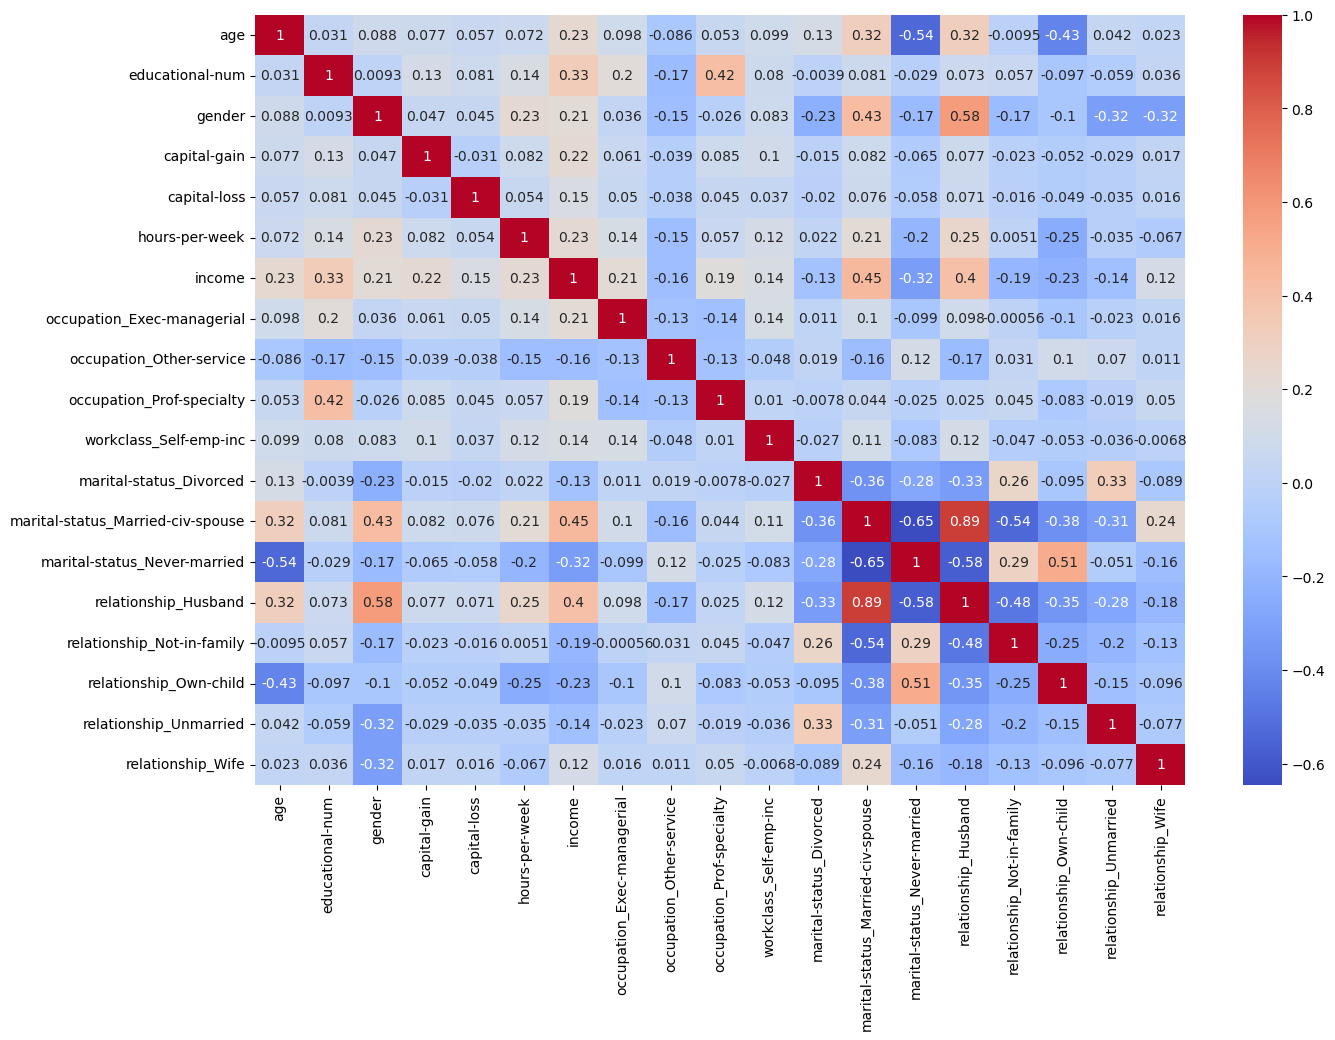

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.2)

In [14]:
test_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
45716,45,121124,15,1,0,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16551,61,69867,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
38858,45,99971,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
46425,18,345285,7,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48777,18,436163,7,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21723,35,48123,8,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21990,37,129573,16,1,0,0,72,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18769,52,242341,4,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7593,42,249332,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
train_X = train_df.drop('income', axis=1)
train_Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_Y = test_df['income']

In [16]:
forest = RandomForestClassifier()

forest.fit(train_X, train_Y)

RandomForestClassifier()

In [17]:
forest.score(test_X, test_Y)

0.8580202681953117

In [18]:
forest.feature_importances_

array([1.49090768e-01, 1.72347824e-01, 1.09113319e-01, 1.06402684e-02,
       1.00357748e-01, 3.31775005e-02, 8.17873362e-02, 1.74487278e-03,
       4.46200693e-03, 3.52150999e-05, 5.48334048e-03, 1.93630540e-02,
       3.88523894e-03, 2.84035222e-03, 3.96077329e-03, 7.10789194e-03,
       1.83406289e-04, 1.83827780e-02, 2.47402309e-03, 5.70582086e-03,
       3.93135882e-03, 3.89933066e-03, 1.76111193e-03, 4.25089077e-03,
       4.99274967e-03, 4.00644142e-08, 8.83477470e-03, 5.89064879e-03,
       7.29985260e-03, 3.91562045e-03, 1.24744898e-04, 6.78055184e-03,
       3.79313331e-04, 6.67684169e-02, 9.68247703e-04, 2.55959316e-02,
       1.77517424e-03, 1.63179185e-03, 4.74453200e-02, 9.59753363e-03,
       1.47245270e-03, 8.19565014e-03, 4.79068548e-03, 9.23302657e-03,
       1.14804311e-03, 2.53505377e-03, 4.35325674e-03, 7.36803970e-04,
       5.58583873e-03, 2.30394680e-03, 3.06422980e-04, 1.04877232e-03,
       4.88219971e-04, 2.85641269e-04, 7.48533029e-04, 2.05574943e-04,
      

In [19]:
forest.feature_names_in_

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status

In [20]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [21]:
importances

{'fnlwgt': 0.17234782407328375,
 'age': 0.14909076770439703,
 'educational-num': 0.10911331891230745,
 'capital-gain': 0.10035774766254275,
 'hours-per-week': 0.08178733621603636,
 'marital-status_Married-civ-spouse': 0.06676841690174311,
 'relationship_Husband': 0.04744532004592262,
 'capital-loss': 0.03317750046666496,
 'marital-status_Never-married': 0.025595931605434205,
 'occupation_Exec-managerial': 0.019363053983000138,
 'occupation_Prof-specialty': 0.018382777971956345,
 'gender': 0.010640268388582048,
 'relationship_Not-in-family': 0.009597533630175598,
 'relationship_Wife': 0.009233026572981784,
 'workclass_Private': 0.00883477470249523,
 'relationship_Own-child': 0.008195650140761065,
 'workclass_Self-emp-not-inc': 0.007299852600740169,
 'occupation_Other-service': 0.007107891943543638,
 'marital-status_Divorced': 0.006780551835668056,
 'workclass_Self-emp-inc': 0.005890648785750619,
 'occupation_Sales': 0.005705820858929127,
 'race_White': 0.005585838729283229,
 'occupation

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [23]:
grid_search.fit(train_X, train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [24]:
forest = grid_search.best_estimator_
forest.score(test_X, test_Y)

0.8651857917903573

In [25]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [27]:
importances

{'educational-num': 0.12744795247874044,
 'capital-gain': 0.11925610405447877,
 'age': 0.11391968642691144,
 'marital-status_Married-civ-spouse': 0.09920327864552787,
 'fnlwgt': 0.09861536786372004,
 'hours-per-week': 0.07250203631849735,
 'relationship_Husband': 0.05288061547223697,
 'capital-loss': 0.03966470061120088,
 'marital-status_Never-married': 0.029849115597387767,
 'occupation_Exec-managerial': 0.02614708835128538,
 'occupation_Prof-specialty': 0.020352561967647464,
 'gender': 0.015118126131080541,
 'relationship_Not-in-family': 0.01364367750560138,
 'relationship_Own-child': 0.0111893916098011,
 'relationship_Wife': 0.01029172975627588,
 'marital-status_Divorced': 0.00966492852497397,
 'occupation_Other-service': 0.009008875288033747,
 'workclass_Self-emp-not-inc': 0.008269157578543102,
 'workclass_Private': 0.007986222172786732,
 'workclass_Self-emp-inc': 0.007061602850211223,
 'relationship_Unmarried': 0.005975407779328381,
 'race_White': 0.005634602060943104,
 'native-co